In [1]:

import csv
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline

In [143]:
pd.set_option('display.max_columns', None)

In [203]:
df = pd.read_csv('capstone2edited.csv')

df['registration_init_time'] =  pd.to_datetime(df['registration_init_time'], format='%Y-%m-%d')
df['transaction_date'] =  pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')
df['membership_expire_date'] =  pd.to_datetime(df['membership_expire_date'], format='%Y-%m-%d')
df['listen_date'] =  pd.to_datetime(df['listen_date'], format='%Y-%m-%d')

In [333]:
df = df[(df.age > 10) & (df.age < 100)]

In [335]:
df.age.value_counts()

27.0    20331
26.0    19574
25.0    18412
28.0    18071
24.0    18060
        ...  
88.0        6
80.0        5
85.0        4
82.0        4
99.0        1
Name: age, Length: 89, dtype: int64

In [138]:
df.is_churn.describe()

# Around 8% of the users in our dataset have churned

count    333302.000000
mean          0.088508
std           0.284033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_churn, dtype: float64

In [386]:
totusers = len(df['userid'])

# define number of total users

In [139]:
df.is_churn.value_counts()

0    303802
1     29500
Name: is_churn, dtype: int64

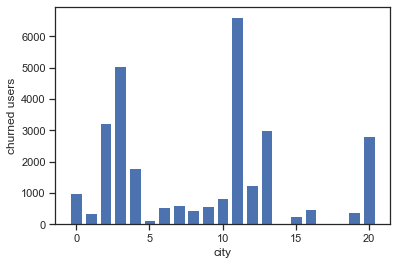

city
1.0      998
3.0      357
4.0     3220
5.0     5033
6.0     1797
7.0      147
8.0      537
9.0      620
10.0     457
11.0     585
12.0     849
13.0    6606
14.0    1264
15.0    2994
16.0      51
17.0     277
18.0     475
19.0      11
20.0      31
21.0     384
22.0    2807
Name: is_churn, dtype: int64

In [325]:
city = df.groupby('city').sum()['is_churn']
plt.bar(np.arange(len(list(city.index))), list(city))
plt.xlabel('city')
plt.ylabel('churned users')
plt.show()
city
# no clear correlation, although cities #13 and #5 show high amounts of churned users, possibly due to population

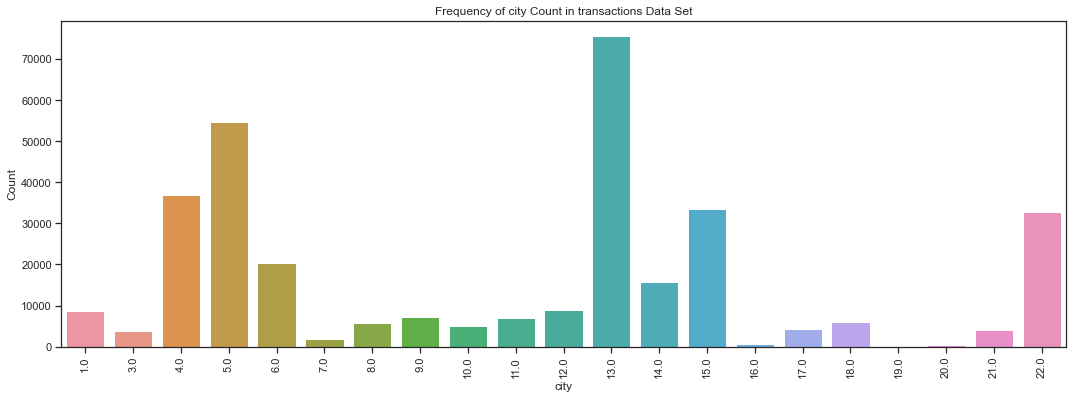

In [324]:
plt.figure(figsize=(18,6))
sns.countplot(x="city", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of city Count in transactions Data Set", fontsize=12)
plt.show()

# confirmed those cities have higher subscriber counts, indicating higher population

<BarContainer object of 2 artists>

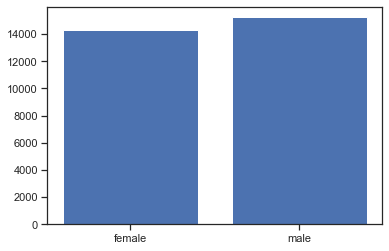

In [299]:
gender = df.groupby('gender').sum()['is_churn']
plt.bar(list(gender.index),list(gender))

# no clear correlation, although male churn sum is slightly higher than female, possibly due to there being more male subscribers

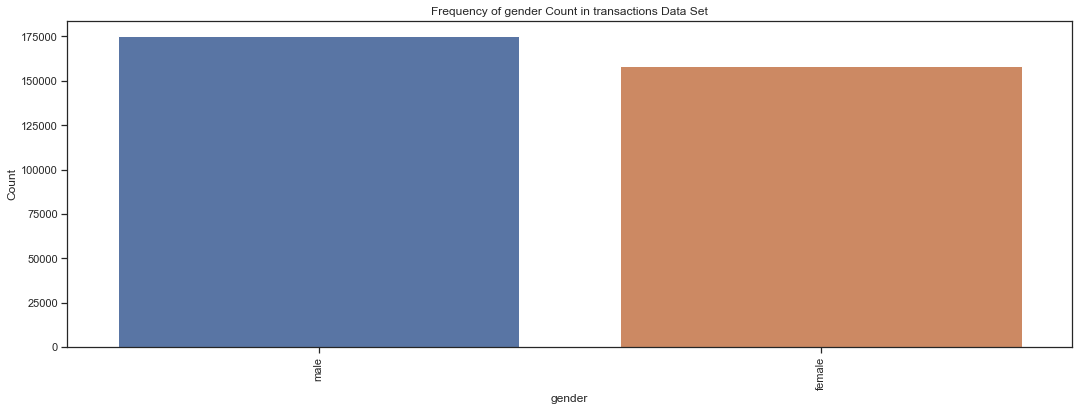

In [326]:
plt.figure(figsize=(18,6))
sns.countplot(x="gender", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of gender Count in transactions Data Set", fontsize=12)
plt.show()

# more male subsribers than femaale subscribers.

(<AxesSubplot:xlabel='age', ylabel='is_churn'>,
 age
 11.0      0
 12.0      1
 13.0      5
 14.0     50
 15.0    128
        ... 
 95.0      1
 96.0      1
 97.0      0
 98.0      1
 99.0      0
 Name: is_churn, Length: 89, dtype: int64)

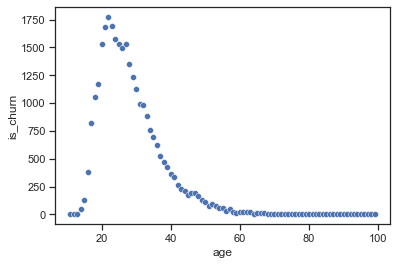

In [345]:
age = df.groupby('age').sum()['is_churn']
sns.scatterplot(data = age), age

# Correlation between age and churn is most likely due to pool of subscribers who are middle-aged

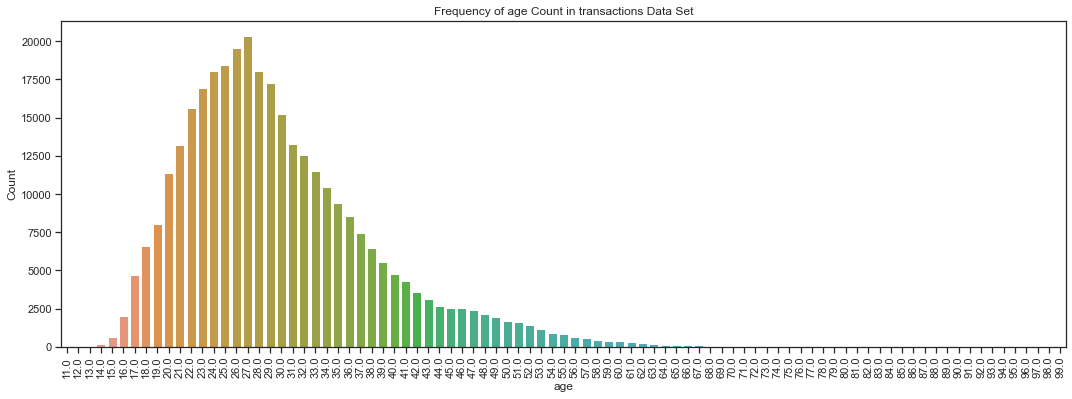

In [346]:
plt.figure(figsize=(18,6))
sns.countplot(x="age", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of age Count in transactions Data Set", fontsize=12)
plt.show()

<AxesSubplot:>

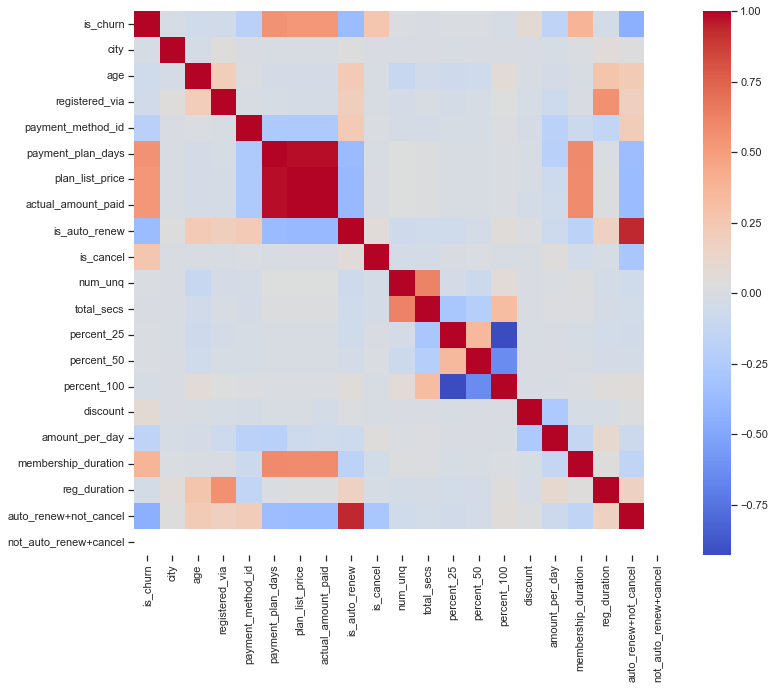

In [409]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),cmap="coolwarm")

# shows correlation between payment info and is_cancel. Need to define more variables such as:
# The criteria of "churn" is no new valid service subscription within 30 days after the current membership expires.
# Might also be helpful to discern differences between payment info variables.

In [145]:
df[df['plan_list_price'] != df.actual_amount_paid]
df['actual_paid_vs_price'] = df['plan_list_price'] - df['actual_amount_paid']

In [147]:
df[df['actual_paid_vs_price'] != 0]

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,registration_day,actual_paid_vs_price
188,W41+ciQWilt3uyS1RROteyZPl6nD0CL9byyZOm6yORA=,1,13.0,29.0,male,7.0,2015-10-10,41.0,30.0,149.0,99.0,1.0,2016-10-09,2017-10-16,0.0,2017-03-31,67.0,105951.043,0.195548,0.085851,0.661367,2868.0,50.0
601,HgI3yHdD5h9UiTUQAdnqUAa26IKPDSkhhl7P7ofe4Mc=,1,12.0,26.0,female,4.0,2015-10-07,40.0,30.0,149.0,0.0,1.0,2017-03-05,2017-04-04,0.0,2017-03-30,58.0,86389.801,0.179954,0.052392,0.751708,2871.0,149.0
635,GUX6AIQLPHXswBsRxiqBXGZjxTQVfq2ydj4BkcNWKmY=,1,22.0,29.0,female,4.0,2017-02-20,40.0,30.0,149.0,0.0,1.0,2017-03-28,2017-04-27,0.0,2017-03-31,118.0,389474.147,0.027336,0.006357,0.963764,2369.0,149.0
637,ypxSlQxAZVbmP5jBZfkO8ZbkgrSep1GbGT6qzt4URMk=,1,9.0,32.0,female,9.0,2004-05-04,40.0,30.0,149.0,0.0,1.0,2017-03-11,2017-04-10,0.0,2017-03-31,86.0,79958.481,0.199571,0.122318,0.628755,7044.0,149.0
754,W43pkl9N0JBdZ9WMtmnS1/n0Kfiq79wQJg7XRdov+qw=,1,22.0,20.0,male,4.0,2015-12-26,30.0,30.0,149.0,0.0,1.0,2017-03-22,2017-04-21,0.0,2017-03-31,59.0,272488.990,0.138117,0.025463,0.820988,2791.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329606,ttVg+Up3bvnmPmH5DJMJ3iLOuLMGGMGjBnLH/5xRtUo=,0,22.0,19.0,female,4.0,2016-11-22,40.0,30.0,149.0,0.0,1.0,2017-03-01,2017-03-31,0.0,2017-03-29,150.0,75599.255,0.347122,0.035971,0.591727,2459.0,149.0
331537,AzOJbb+RXgvwWWiZGZ1hwtfSgP83gq5ybZTSBd8RLI0=,0,13.0,28.0,male,9.0,2009-06-04,23.0,30.0,149.0,99.0,1.0,2017-03-31,2017-04-30,0.0,2017-03-31,17.0,78465.016,0.085333,0.018667,0.890667,5187.0,50.0
331678,HrQN6eOeXX9p1sUFfnbAJ2/idXKksP3hPhjmxF+L294=,0,13.0,23.0,female,9.0,2011-01-19,40.0,30.0,149.0,0.0,1.0,2017-03-26,2017-04-28,0.0,2017-03-31,50.0,170853.880,0.106784,0.026382,0.859296,4593.0,149.0
332504,BNHk/6i5Q0EahDTJ8abyvpa9lBfQ3D5n9nK7zve0I6A=,0,22.0,23.0,male,9.0,2015-11-01,23.0,30.0,149.0,99.0,1.0,2017-02-28,2017-05-17,0.0,2017-03-31,227.0,822798.490,0.005110,0.001503,0.989179,2846.0,50.0


In [288]:
df = df.drop(columns= 'days_delta')

In [240]:
df['membership_duration'] = df ['membership_expire_date']-  df['transaction_date']


In [210]:
df['discount'] = df['plan_list_price'] - df['actual_amount_paid']

In [218]:
df['amount_per_day'] = df['actual_amount_paid'] / df['payment_plan_days']

In [241]:
df.membership_duration = df.membership_duration / np.timedelta64(1, 'D')

In [243]:
df['reg_duration'] = df['membership_expire_date'] - df['registration_init_time']

In [245]:
df.reg_duration = df.reg_duration / np.timedelta64(1, 'D')
df

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,registration_day,days_delta,discount,amount_per_day,membership_duration,reg_duration
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0,2017-03-20,9.0,6986.509,0.000000,0.125000,0.812500,3524.0,31.0,0.0,6.000000,31.0,1205.0
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,90.0,300.0,300.0,0.0,2017-03-11,2017-06-15,0.0,2017-03-31,82.0,67810.467,0.430631,0.102703,0.409009,3520.0,96.0,0.0,3.333333,96.0,1266.0
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25,41.0,30.0,99.0,99.0,1.0,2016-10-01,2017-09-18,0.0,2017-03-31,62.0,239882.241,0.009128,0.007099,0.979716,3491.0,352.0,0.0,3.300000,352.0,1332.0
3,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.0,28.0,female,3.0,2014-02-02,38.0,410.0,1788.0,1788.0,0.0,2017-03-24,2018-05-13,0.0,2017-03-31,72.0,290831.795,0.066838,0.017138,0.890317,3483.0,415.0,0.0,4.360976,415.0,1561.0
4,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,13.0,21.0,female,9.0,2014-02-12,38.0,90.0,477.0,477.0,0.0,2017-03-07,2017-07-07,0.0,2017-03-31,99.0,179129.056,0.260519,0.077887,0.623098,3473.0,122.0,0.0,5.300000,122.0,1241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333297,SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=,0,15.0,19.0,male,9.0,2011-08-23,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-05-20,0.0,2017-03-30,50.0,107817.992,0.278755,0.043302,0.645467,4377.0,81.0,0.0,4.966667,81.0,2097.0
333298,5NE9tsGhg7HbFNMdPT+3tytaIKG5013bBQG2vQTe+OI=,0,4.0,23.0,female,9.0,2011-08-26,37.0,30.0,149.0,149.0,1.0,2017-03-26,2017-04-25,0.0,2017-03-29,26.0,11941.211,0.333333,0.177083,0.427083,4374.0,30.0,0.0,4.966667,30.0,2069.0
333299,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0,8.0,25.0,female,7.0,2011-08-30,41.0,30.0,149.0,149.0,1.0,2017-03-17,2017-04-17,0.0,2017-03-31,96.0,125205.826,0.177542,0.039454,0.737481,4370.0,31.0,0.0,4.966667,31.0,2057.0
333300,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,13.0,28.0,male,7.0,2011-08-31,40.0,30.0,149.0,149.0,1.0,2017-03-04,2017-04-03,0.0,2017-03-31,70.0,77031.435,0.124352,0.018135,0.847150,4369.0,30.0,0.0,4.966667,30.0,2042.0


In [283]:
df['auto_renew+not_cancel'] = (df['is_auto_renew'] == 1) & (df['is_cancel'] == 0).astype(int)

In [284]:
df['not_auto_renew+cancel'] = (df['is_auto_renew'] == 0) & (df['is_cancel'] == 1).astype(int)

In [285]:
df

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,days_delta,discount,amount_per_day,membership_duration,reg_duration,auto_renew+not_cancel,not_auto_renew+cancel
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0,2017-03-20,9.0,6986.509,0.000000,0.125000,0.812500,31.0,0.0,6.000000,31.0,1205.0,False,False
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,90.0,300.0,300.0,0.0,2017-03-11,2017-06-15,0.0,2017-03-31,82.0,67810.467,0.430631,0.102703,0.409009,96.0,0.0,3.333333,96.0,1266.0,False,False
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25,41.0,30.0,99.0,99.0,1.0,2016-10-01,2017-09-18,0.0,2017-03-31,62.0,239882.241,0.009128,0.007099,0.979716,352.0,0.0,3.300000,352.0,1332.0,True,False
3,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.0,28.0,female,3.0,2014-02-02,38.0,410.0,1788.0,1788.0,0.0,2017-03-24,2018-05-13,0.0,2017-03-31,72.0,290831.795,0.066838,0.017138,0.890317,415.0,0.0,4.360976,415.0,1561.0,False,False
4,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,13.0,21.0,female,9.0,2014-02-12,38.0,90.0,477.0,477.0,0.0,2017-03-07,2017-07-07,0.0,2017-03-31,99.0,179129.056,0.260519,0.077887,0.623098,122.0,0.0,5.300000,122.0,1241.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333297,SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=,0,15.0,19.0,male,9.0,2011-08-23,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-05-20,0.0,2017-03-30,50.0,107817.992,0.278755,0.043302,0.645467,81.0,0.0,4.966667,81.0,2097.0,True,False
333298,5NE9tsGhg7HbFNMdPT+3tytaIKG5013bBQG2vQTe+OI=,0,4.0,23.0,female,9.0,2011-08-26,37.0,30.0,149.0,149.0,1.0,2017-03-26,2017-04-25,0.0,2017-03-29,26.0,11941.211,0.333333,0.177083,0.427083,30.0,0.0,4.966667,30.0,2069.0,True,False
333299,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0,8.0,25.0,female,7.0,2011-08-30,41.0,30.0,149.0,149.0,1.0,2017-03-17,2017-04-17,0.0,2017-03-31,96.0,125205.826,0.177542,0.039454,0.737481,31.0,0.0,4.966667,31.0,2057.0,True,False
333300,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,13.0,28.0,male,7.0,2011-08-31,40.0,30.0,149.0,149.0,1.0,2017-03-04,2017-04-03,0.0,2017-03-31,70.0,77031.435,0.124352,0.018135,0.847150,30.0,0.0,4.966667,30.0,2042.0,True,False


<AxesSubplot:>

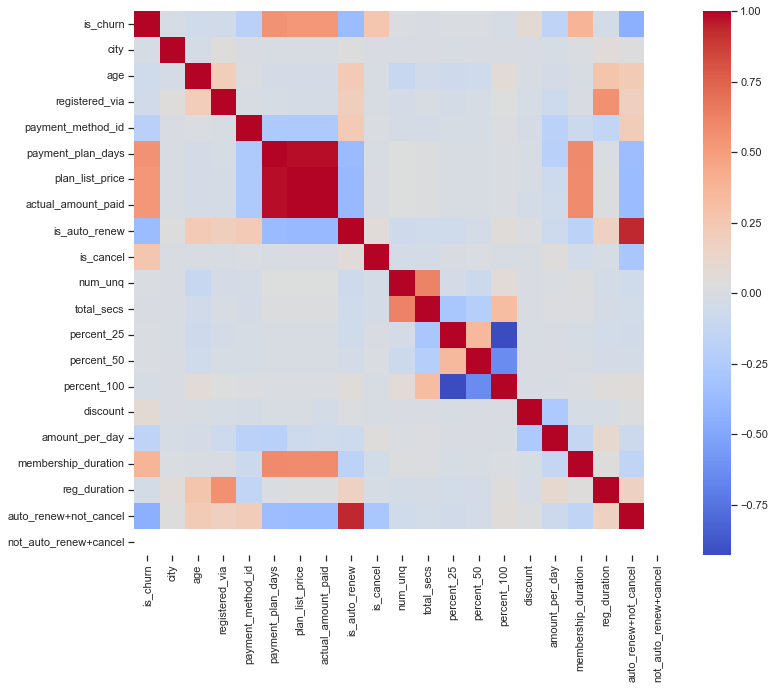

In [408]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")

# Another correlation between membership_duration and is_churn is found. That is, the difference in days between the oldest 
# transaction and the latest membership expire date 

Text(0, 0.5, '% of churned users')

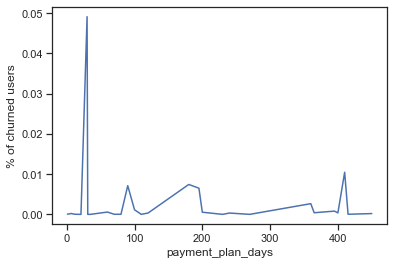

In [392]:
pp = (df.groupby('payment_plan_days').sum()['is_churn'])
pp = pp / totusers
plt.plot(list(pp.index), list(pp))
plt.xlabel('payment_plan_days')
plt.ylabel('% of churned users')


Text(0, 0.5, '% of churned users')

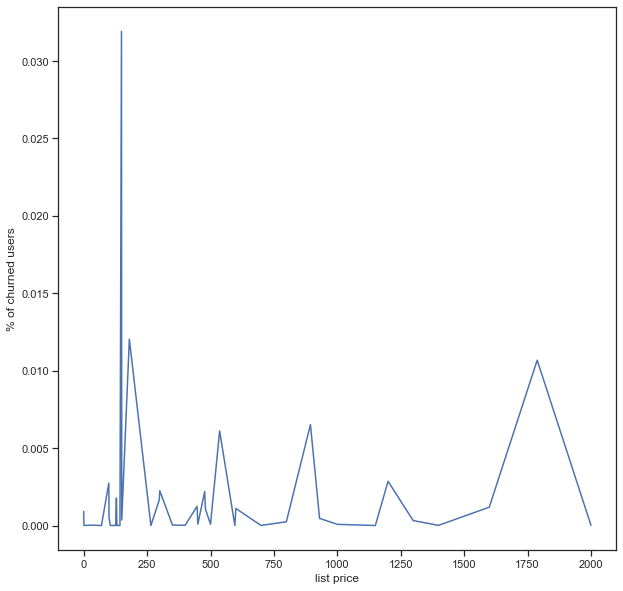

In [396]:
planprice = df.groupby('plan_list_price').sum()['is_churn']
planprice = planprice / totusers
fig = plt.figure(figsize=(10, 10))
plt.plot(list(planprice.index), list(planprice))
plt.xlabel('list price')
plt.ylabel('% of churned users')

Text(0, 0.5, '% of churned users')

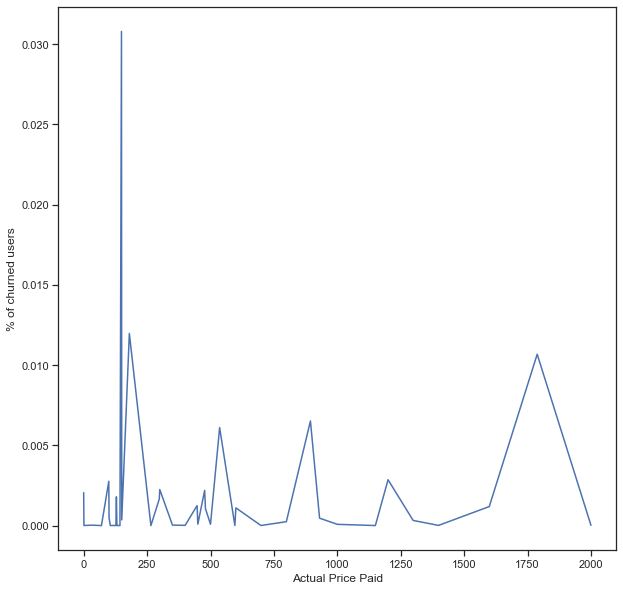

In [397]:
actualpaid = df.groupby('actual_amount_paid').sum()['is_churn']
actualpaid = actualpaid/ totusers
fig = plt.figure(figsize=(10, 10))
plt.plot(list(actualpaid.index), list(actualpaid))
plt.xlabel('Actual Price Paid')
plt.ylabel('% of churned users')

In [374]:
df.discount.value_counts()

# both plots seem to resemble each other - makes sense since acutal amount paid vs listed price is almost always the same.
# We will use acutal amount paid as the depedent variable.

 0.0      332376
 149.0       462
 50.0        281
 20.0        109
 180.0        65
 30.0          5
-1.0           2
 129.0         1
 1.0           1
Name: discount, dtype: int64

(0.0, 500.0)

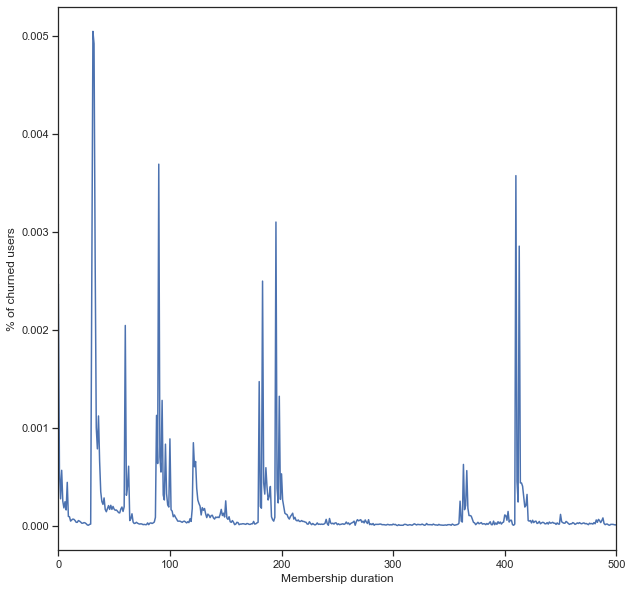

In [398]:
memduration = df.groupby('membership_duration').sum()['is_churn']
memduration = memduration / totusers
fig = plt.figure(figsize=(10, 10))
plt.plot(list(memduration.index), list(memduration))
plt.xlabel('Membership duration')
plt.ylabel('% of churned users')
plt.xlim([0,500])



([<matplotlib.axis.XTick at 0x263eb632b50>,
 [Text(0, 0, ''), Text(0, 0, '')])

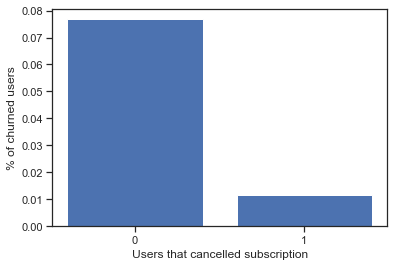

In [407]:
cancel = df.groupby('is_cancel').sum()['is_churn']
cancel = cancel / totusers
plt.bar(list(cancel.index), list(cancel))
plt.xlabel('Users that cancelled subscription')
plt.ylabel('% of churned users')
plt.xticks(ticks = [0,1])

# members that do choose to cancel are less likely to churn?? possibly because most subscription cancellations are due to
# a plan change, not because the user is actually cancelling their subscriptions forever.

([<matplotlib.axis.XTick at 0x263ebee9be0>,
 [Text(0, 0, ''), Text(0, 0, '')])

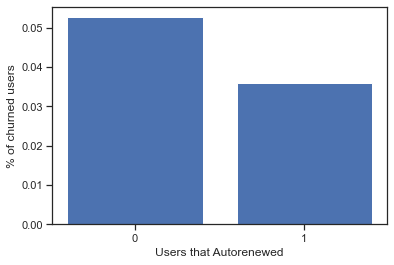

In [414]:
autorenew = df.groupby('is_auto_renew').sum()['is_churn']
autorenew = autorenew / totusers
plt.bar(list(autorenew.index), list(autorenew))
plt.xlabel('Users that Autorenewed')
plt.ylabel('% of churned users')
plt.xticks(ticks = [0,1])

<AxesSubplot:>

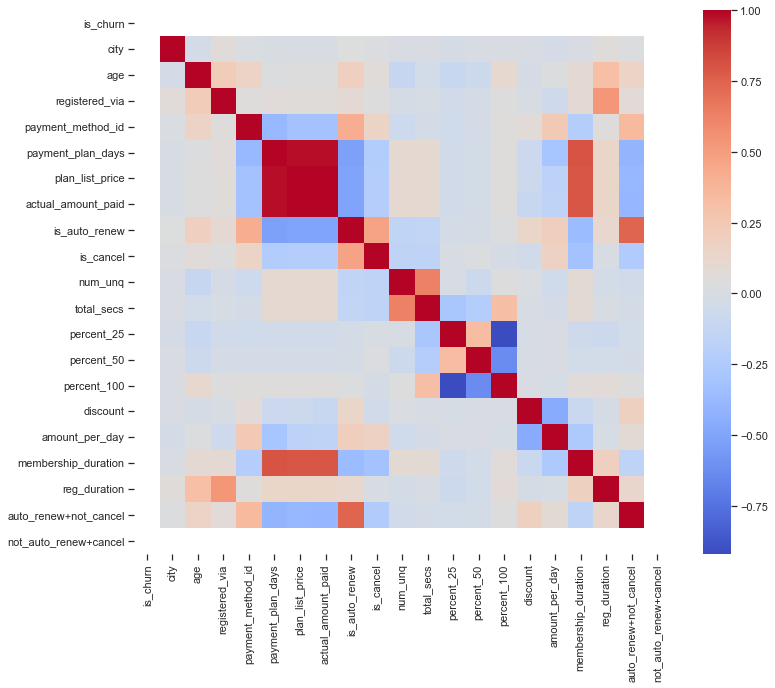

In [412]:
churned = df[df['is_churn'] == 1]
plt.subplots(figsize=(12,10))
sns.heatmap(churned.corr(), cmap="coolwarm")

# shows that users that have churned have a correlation between auto-renewing and cancelling their subscription. 
# This doesn't give us any new info or help with above suspicion but something to note.

<AxesSubplot:>

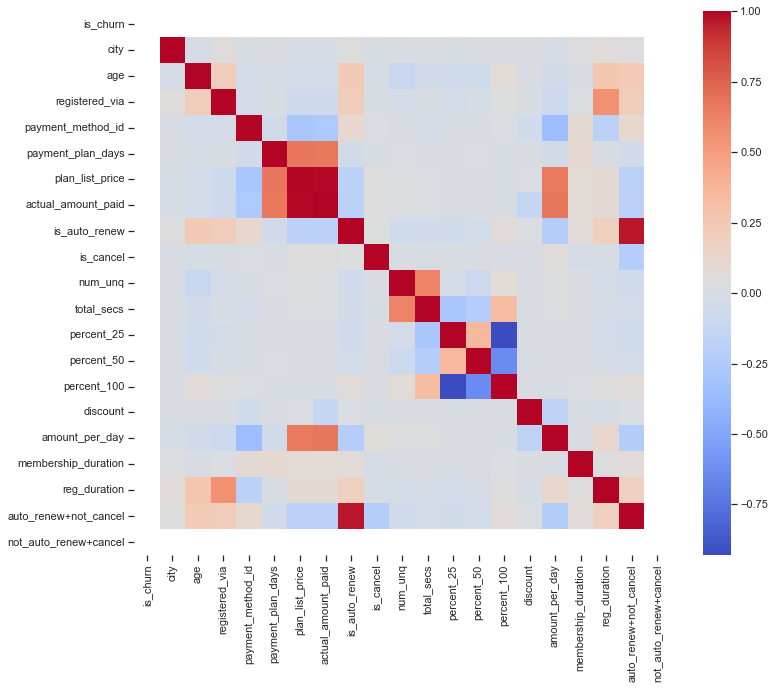

In [411]:
nchurned = df[df['is_churn'] == 0]
plt.subplots(figsize=(12,10))
sns.heatmap(nchurned.corr(), cmap="coolwarm")

# doesn't seem to be any useful info on this heatmap for users that haven't churned.